<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Bivariate Analysis

<font color=darkblue>
    
Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two 
variables.

&nbsp;

There are essentially 3 major scenarios that we will come across when we perform bivariate analysis
1. Both variables of interest are qualitative
2. One variable is qualitative and the other is quantitative
3. Both variables are quantitative

&nbsp;

For the purpose of this exercise, we will explore few most popular techniques to perform bivariate analysis.

The following plots are not limited to the headings they are under. They are the options we have if we face a certain scenario.



### Numerical Vs Numerical
- Scatterplot
- line chart
- heatmap for correlation
- joint plot

### Numerical vs Categorical
- Bar chart
- violin plot
- Categorical boxplot
- swarm plot

### Categorical vs categorical
- Bar chart
- Group Bar chart
- Point plot

### Case Study (Suicide Rates Overview 1985 to 2016)
**Our aim is to explore the data of suicide rates.**

- Lets start using the above techniques on a practical dataset. We will be using data about suicide rates from 1985 to 2026.

**source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016**


1. Dataset Feature List
2. country
3. year
4. sex
5. age
6. suicides_no
7. population
8. suicides/100k pop
9. country-year
10. HDI for year
11. gdp_for_year
12. gdp_per_capita
13. generation

### 1.1 Loading Libraries

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Import the dataset Master.csv

In [39]:
data = pd.read_csv('master.csv')
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [40]:
# Check the data describe
data.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [41]:
#check the number of Columns
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [42]:
#Check the shape of the data
data.shape

(27820, 12)

In [43]:
#count the data types
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [44]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [45]:
#check the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [46]:
#Chcecking the missing values
data.isnull().sum().sort_values(ascending = False)


HDI for year          19456
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [47]:
data.shape[0]

27820

In [48]:
#write a function that take dataframe and give the total and percentage missing values
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    count = df.shape[0]
    percent = round(total / count,2) * 100
    value = pd.concat([total,percent],axis = 1,keys=['Total','Percent'])
    return value

In [49]:
result = missing_data(data)
result

Total  Percent
HDI for year        19456     70.0
country                 0      0.0
year                    0      0.0
sex                     0      0.0
age                     0      0.0
suicides_no             0      0.0
population              0      0.0
suicides/100k pop       0      0.0
country-year            0      0.0
 gdp_for_year ($)       0      0.0
gdp_per_capita ($)      0      0.0
generation              0      0.0

In [50]:
#descriptive stats of continuous columns
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [51]:
data[['suicides_no','population','suicides/100k pop','HDI for year',' gdp_for_year ($) ','gdp_per_capita ($)']].describe()

suicides_no    population  suicides/100k pop  HDI for year  \
count  27820.000000  2.782000e+04       27820.000000   8364.000000   
mean     242.574407  1.844794e+06          12.816097      0.776601   
std      902.047917  3.911779e+06          18.961511      0.093367   
min        0.000000  2.780000e+02           0.000000      0.483000   
25%        3.000000  9.749850e+04           0.920000      0.713000   
50%       25.000000  4.301500e+05           5.990000      0.779000   
75%      131.000000  1.486143e+06          16.620000      0.855000   
max    22338.000000  4.380521e+07         224.970000      0.944000   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000

### 1.10 Frequency table for age

In [52]:
# crosstab group by a series by age
pd.crosstab(index = data['age'], columns='count')


col_0        count
age               
15-24 years   4642
25-34 years   4642
35-54 years   4642
5-14 years    4610
55-74 years   4642
75+ years     4642

### 1.11 check number of suicides by country

In [53]:
#check the highest number of suicides

<AxesSubplot:xlabel='country'>

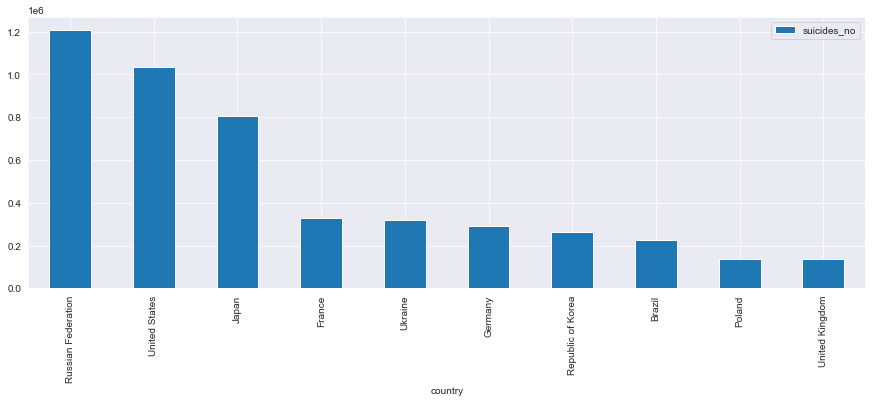

In [54]:
data.groupby('country')['suicides_no'].sum().reset_index().sort_values('suicides_no',ascending = False).head(10).plot(x = 'country', y = 'suicides_no',kind='bar',figsize=(15,5))


* Russia has the highest number of suicides followed by the US and Japan
* Russia, the US and Japan have exceptionally high counts of suicides compared to the others in the lot

<AxesSubplot:xlabel='country'>

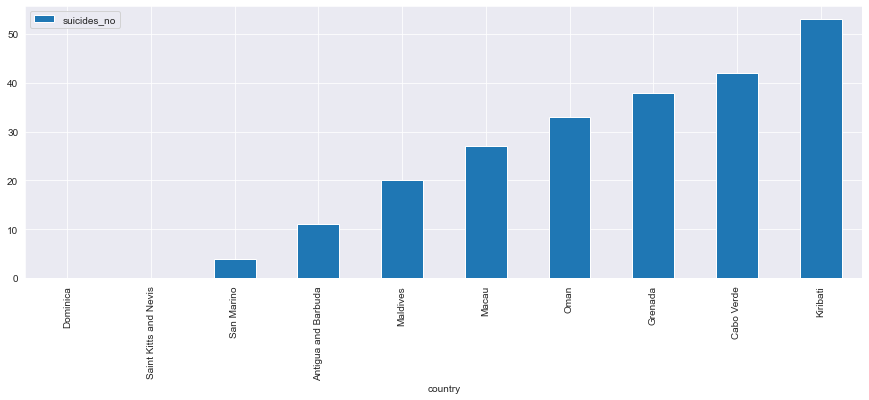

In [55]:
#Check the lowest number of suicides
data.groupby('country')['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending = True).head(10).plot(x = 'country', y = 'suicides_no',kind='bar',figsize = (15,5))

### 1.13 Barplot for the number of suicides vs Age

<AxesSubplot:xlabel='age', ylabel='suicides_no'>

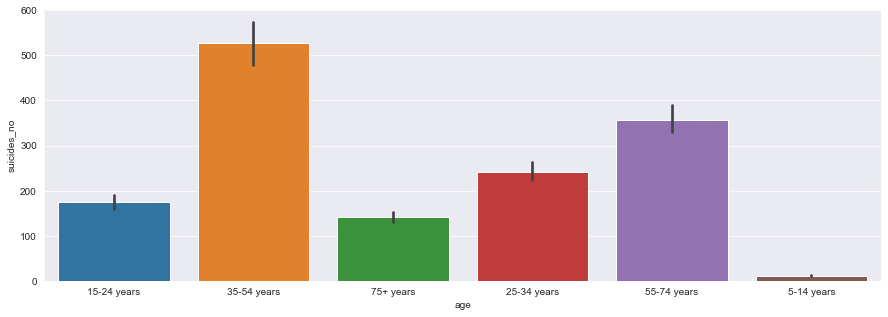

In [56]:
plt.figure(figsize=(15,5))#increase the screen size to (15,5)
sns.barplot(x = 'age', y ='suicides_no',data=data)

### Barplot Number of suicides vs sex

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

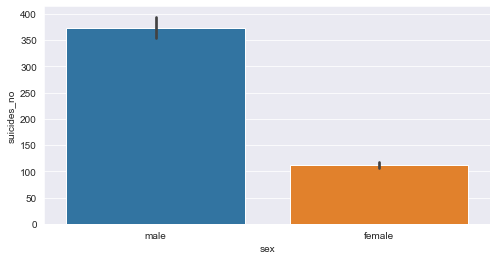

In [57]:
plt.figure(figsize = (8,4))
sns.barplot(x='sex', y= 'suicides_no',data = data)

### 1.15 Bar plot Number of Suicides Vs generation

<AxesSubplot:xlabel='generation', ylabel='suicides_no'>

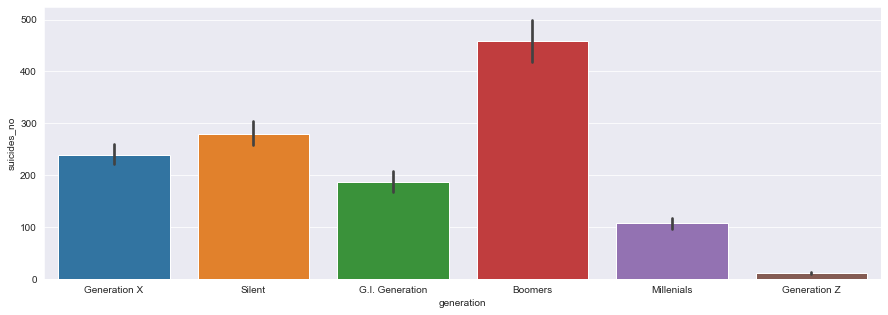

In [58]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'generation', y ='suicides_no', data = data)

* Suicides are the highest among the Boomers and lowest among Generation Z

### 1.15 Scatter plot Number of Suicides Vs population

(<AxesSubplot:xlabel='population', ylabel='suicides_no'>,)

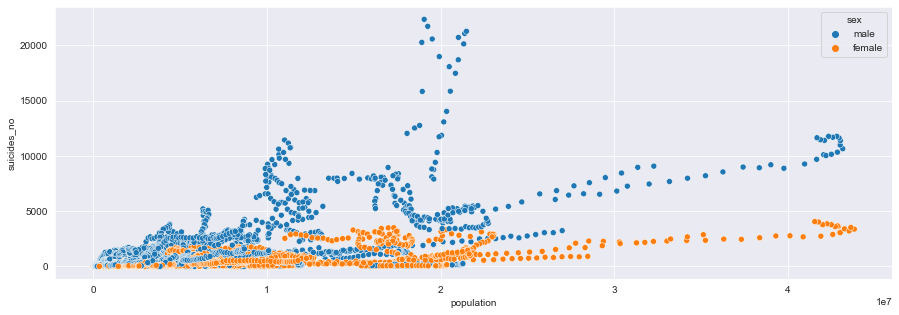

In [59]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = "population", y = 'suicides_no', data = data,hue ='sex'),

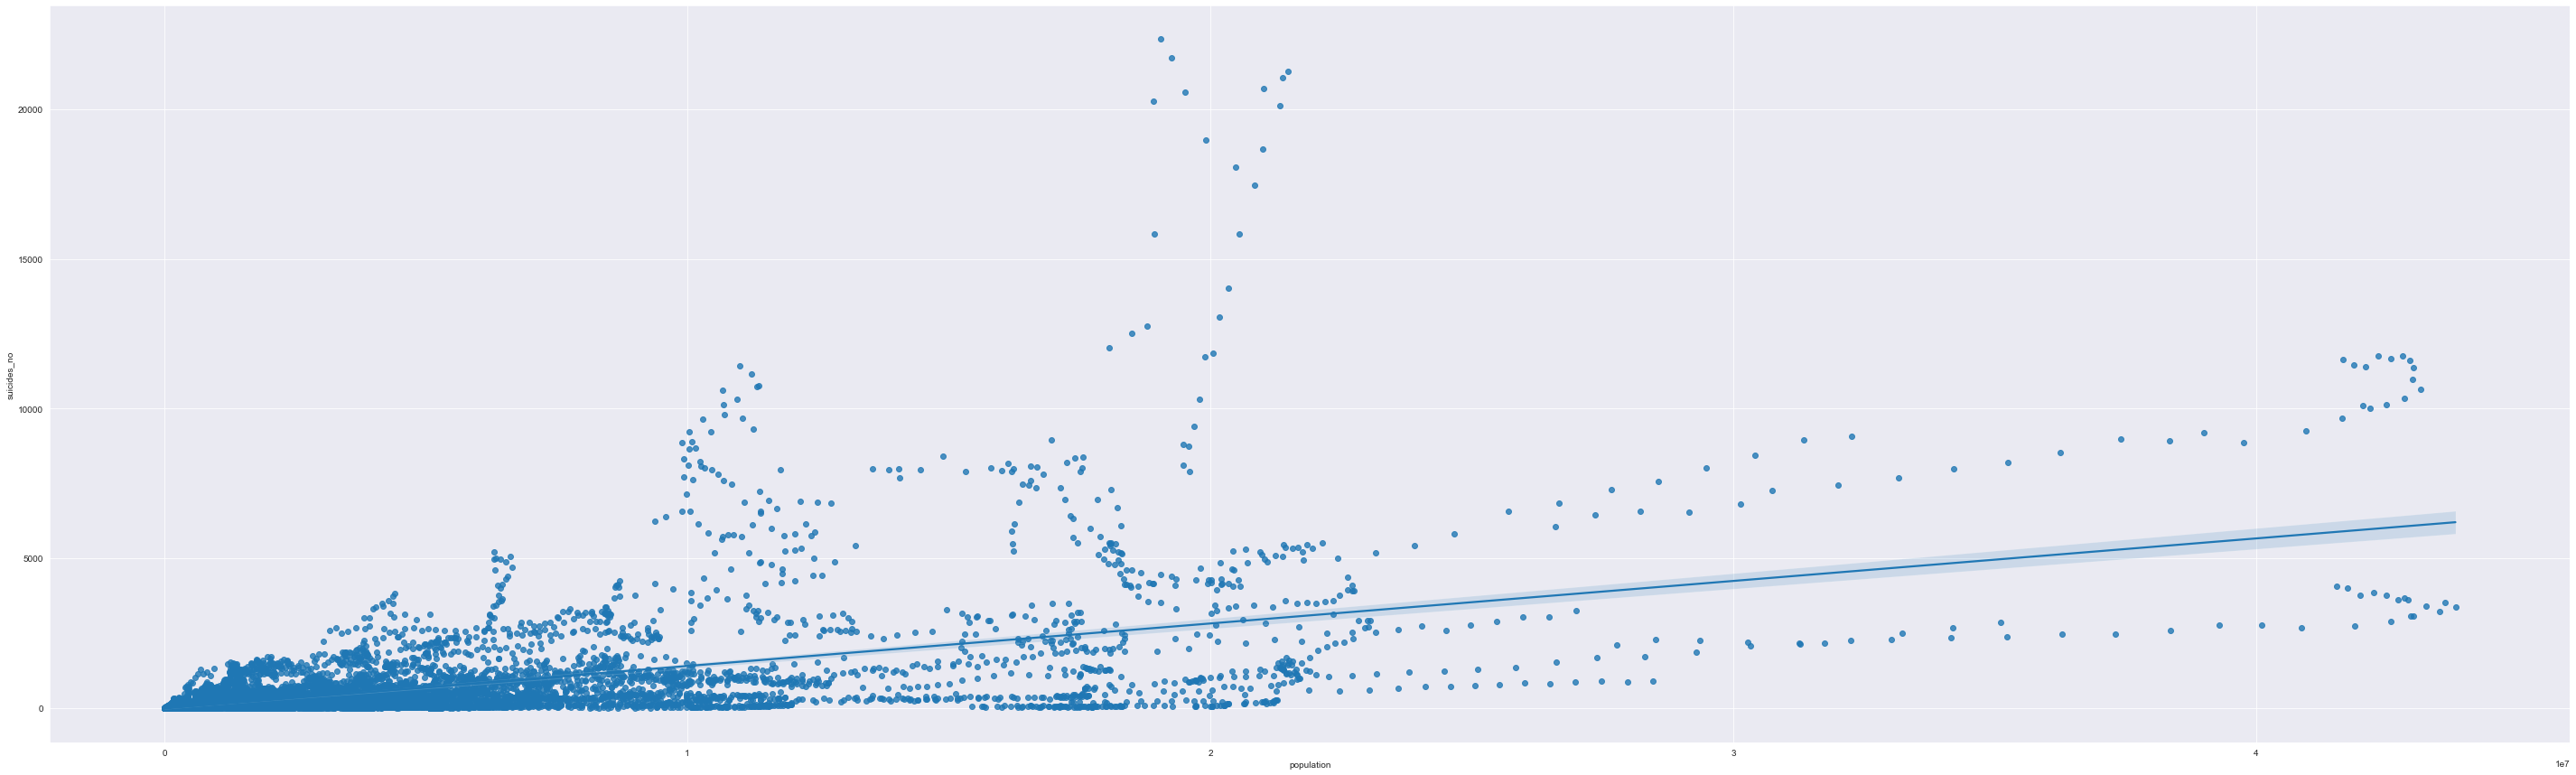

In [60]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population',y='suicides_no', data=data ) # regression plot - scatter plot with a regression line

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

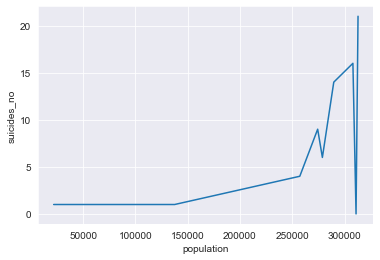

In [61]:
#Here we plotting a line plot.
sns.lineplot(x='population',y='suicides_no', data=data.head(10) )

### Scatter plot Number of Suicides/100k Population Vs GDP Per Capita

In [62]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

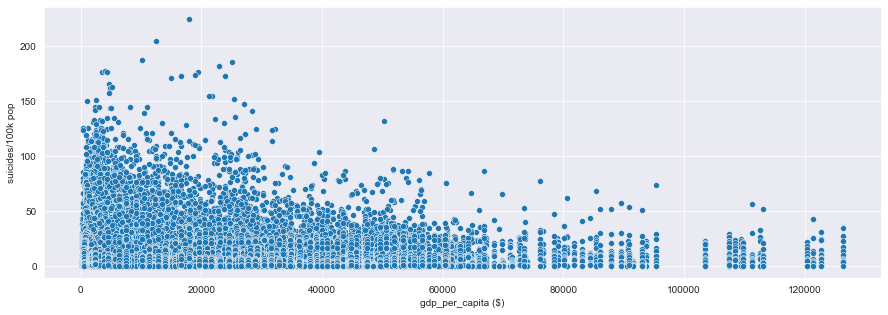

In [63]:
plt.figure(figsize = (15,5))
sns.scatterplot(x ='gdp_per_capita ($)', y ='suicides/100k pop',data = data )

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

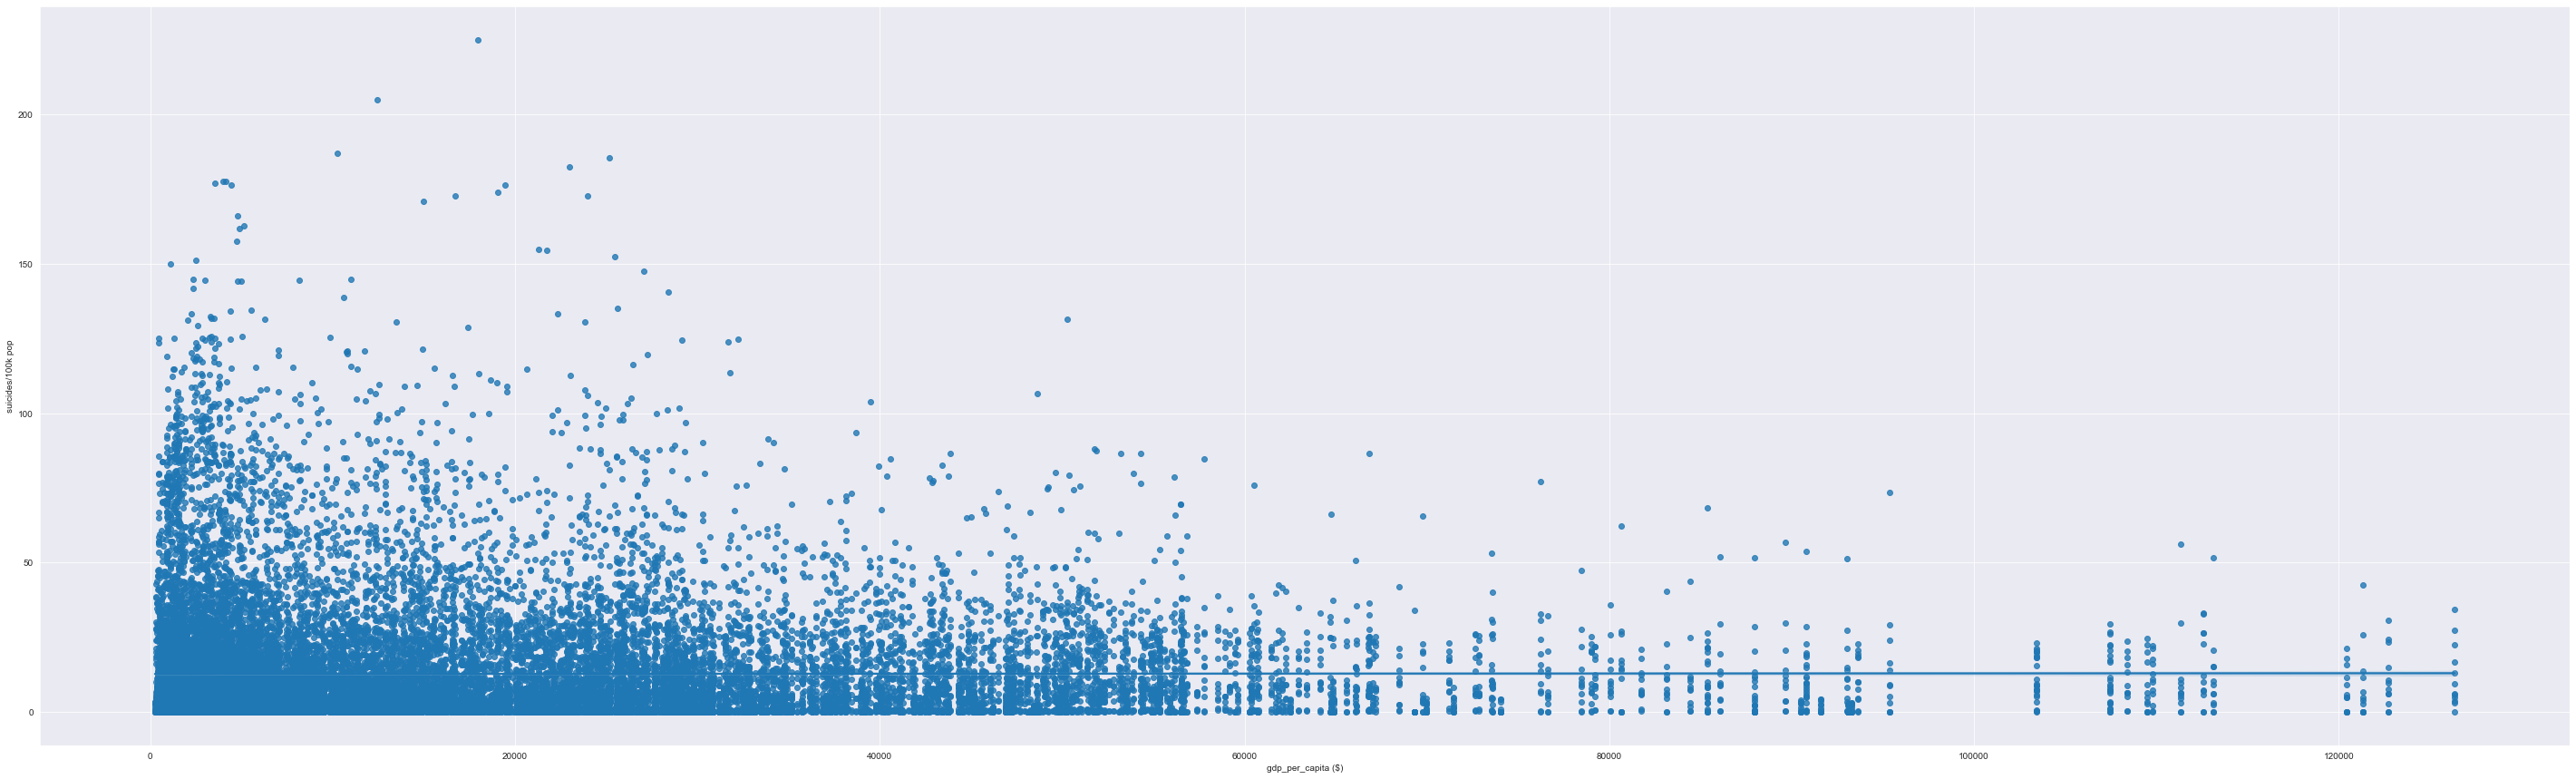

In [64]:
plt.figure(figsize = (50,15))
sns.regplot(x ='gdp_per_capita ($)', y ='suicides/100k pop',data = data )

* Looks like higher suicide rates are a bit more prevalent in countries with lower GDP
* However, it doesn't look like there any significant correlation between the two

### Correlation among pairs of continuous variables

In [65]:
data.corr()

year  suicides_no  population  suicides/100k pop  \
year                1.000000    -0.004546    0.008850          -0.039037   
suicides_no        -0.004546     1.000000    0.616162           0.306604   
population          0.008850     0.616162    1.000000           0.008285   
suicides/100k pop  -0.039037     0.306604    0.008285           1.000000   
HDI for year        0.366786     0.151399    0.102943           0.074279   
gdp_per_capita ($)  0.339134     0.061330    0.081510           0.001785   

                    HDI for year  gdp_per_capita ($)  
year                    0.366786            0.339134  
suicides_no             0.151399            0.061330  
population              0.102943            0.081510  
suicides/100k pop       0.074279            0.001785  
HDI for year            1.000000            0.771228  
gdp_per_capita ($)      0.771228            1.000000

<AxesSubplot:>

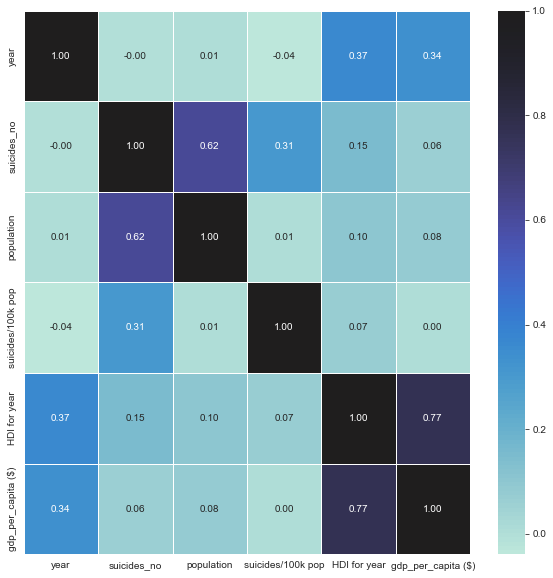

In [66]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True,fmt='.2f',linewidths=0.5,center = 1)


* Instead of doing a simple df.corr(), we can use the heatmap when there are large number of variables
* The color helps with picking out the most correlated easily
* In the above case, we don't have a lot of variables the plot is just for demonstration
* The darker the color higher the correlation
* None of the attributes seem have correlation of real significance
* Some obvious correlations are that in a larger population, it is very likely that the number of suicides will be more
* Human Development Index - gdp per capita is the only pair with the most correlation 


### 1.17.1 Bar plot To check Number of suicides by sex and age (three variables used to generate a single plot
- This is an example of Numerical and 2 Categorical variables

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

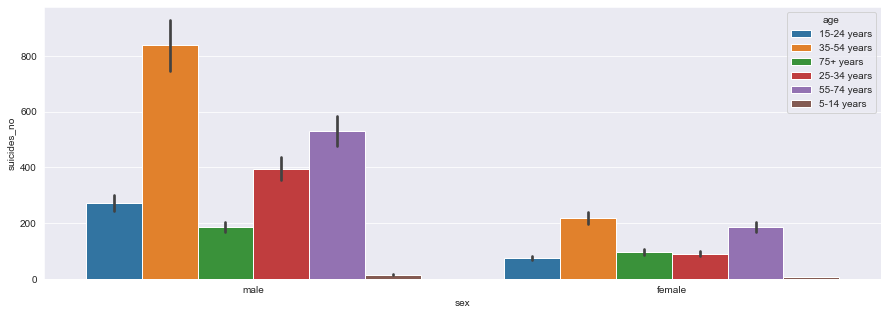

In [67]:
plt.figure(figsize = (15,5))
sns.barplot(x= 'sex',y = 'suicides_no', data = data,hue ='age')

- 1.17.2 Bar plot To check Number of suicides by sex and Generation(three variables used to generate a single plot)

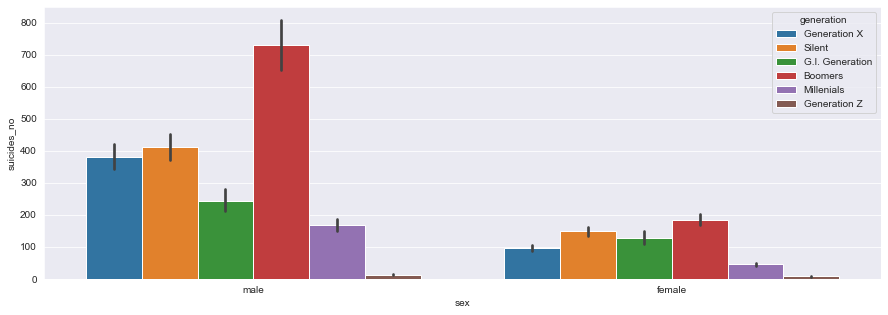

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='generation')
plt.show()

* Suicides in males apart from being higher, has a slight variation in distribution across generations compared to the suicides of females across generation
* In case of males, Generation X has higher suicide numbers compared to G.I Generation but in case of females, it is the opposite

### 1.18 Checking the No.of suicides: Country Vs Sex

<AxesSubplot:xlabel='country', ylabel='suicides_no'>

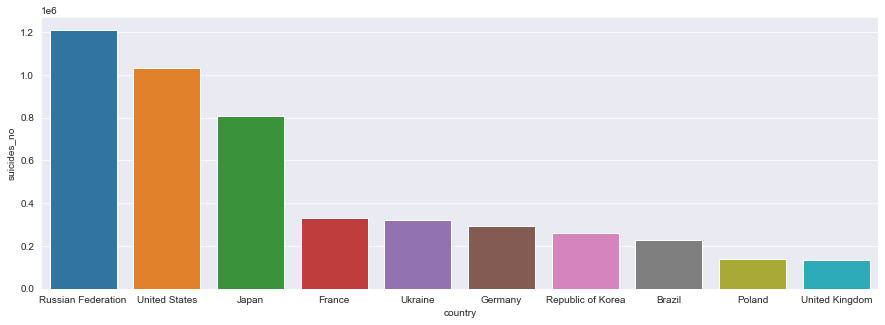

In [69]:
data.head()
data1 = data.groupby("country")['suicides_no'].sum().reset_index().sort_values("suicides_no",ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(x= "country", y = "suicides_no",data=data1.head(10))

<AxesSubplot:xlabel='country', ylabel='suicides_no'>

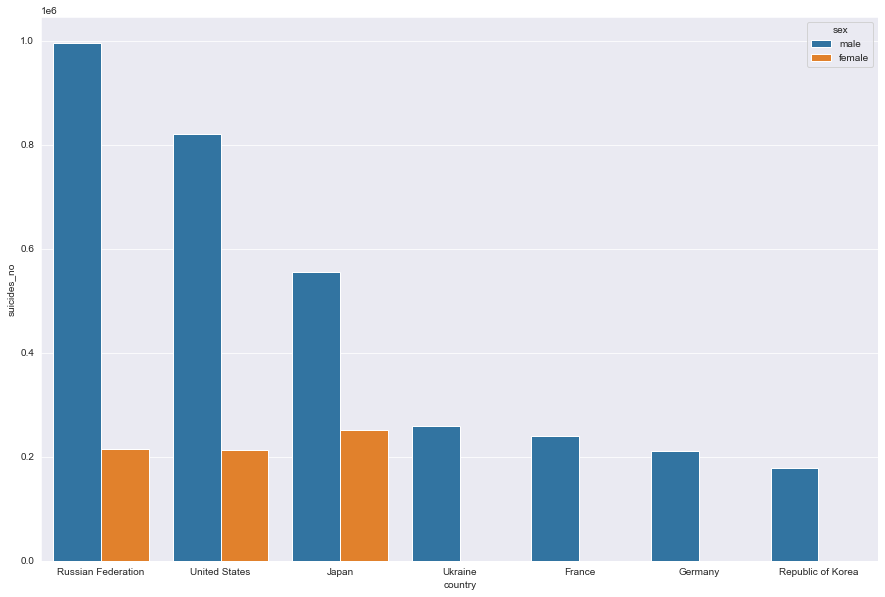

In [70]:
#sort values by country,sex vs suicides_no
data2 = data.groupby(["country","sex"])['suicides_no'].sum().reset_index().sort_values("suicides_no",ascending = False)
plt.figure(figsize = (15,10))
sns.barplot(x= "country", y = "suicides_no",data=data2.head(10),hue ='sex')

- Japan has a higher proportion of female suicides compared to the countries with overall suicide rates even more high


### Average number of suicides across each generation for a given gender along with the confidence intervals - Point Plot

<AxesSubplot:xlabel='generation', ylabel='suicides_no'>

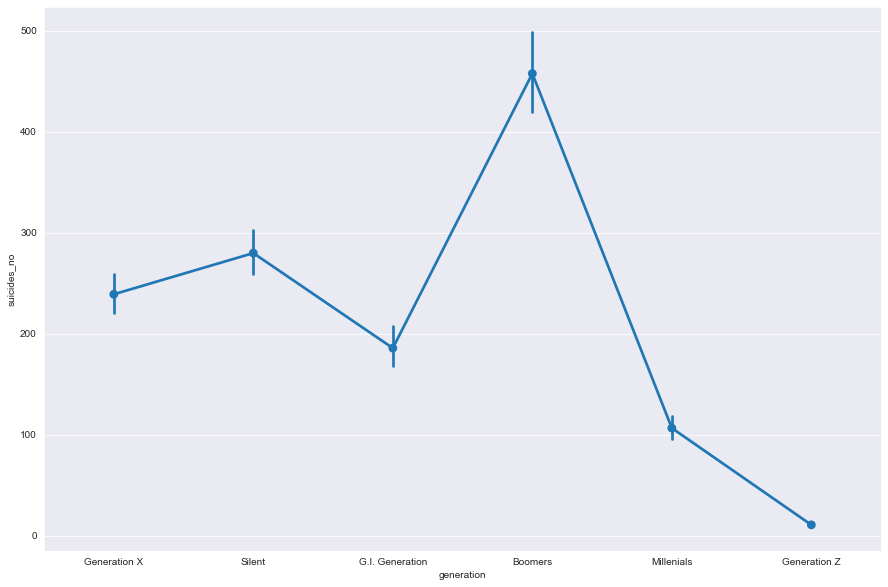

In [71]:
plt.figure(figsize = (15,10))
sns.pointplot(x="generation", y="suicides_no",  data=data)


- The graph tells us the average suicides along with the confidence intervals 
- Suicides among females in general don't seem to be fluctuating a lot
- Average suicides of Gen-Z are almost equally distributed across genders

### Distribution of population across each generation - Violin plot

In [72]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<AxesSubplot:xlabel='generation', ylabel='population'>

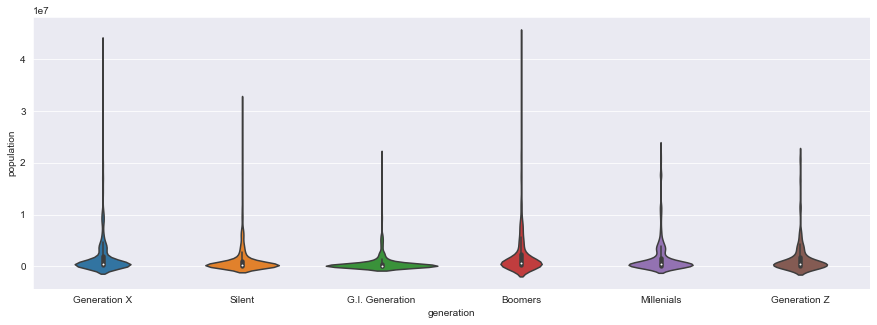

In [73]:
plt.figure(figsize = (15,5))
sns.violinplot(x = data['generation'], y = data['population'], data = data)


* The plot is similar to a box plot but here, we get a density function
* Distribution of population across every generation is highly skewed
* Potential of lot of outliers
* Try it yourself -  Go ahead and check if there really are a lot of outliers in populations across each generation
  

<AxesSubplot:xlabel='generation', ylabel='population'>

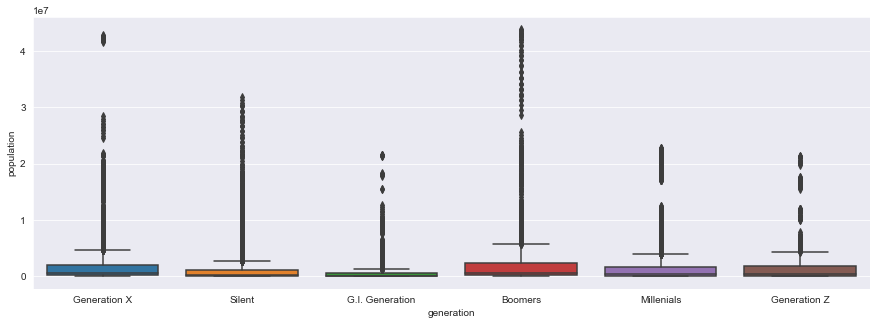

In [74]:
plt.figure(figsize = (15,5))
sns.boxplot(x = data['generation'], y = data['population'], data = data)

### Checking trends with Temporal Data 

<font color = green>
- Temporal data is simply data that represents a state in time, such as the land-use patterns of Hong Kong in 1990,
- or total rainfall in Honolulu on July 1, 2009. Temporal data is collected to analyze weather patterns and other environmental variables, monitor traffic conditions, study demographic trends, and so on. This data comes from many sources ranging
from manual data entry to data collected using observational sensors or generated from simulation models.

 **Checking pattern using Trend plot (1985-2015) suides Rate Vs Years**

In [75]:
data[["suicides_no","year"]]
#data.columns

suicides_no  year
0               21  1987
1               16  1987
2               14  1987
3                1  1987
4                9  1987
...            ...   ...
27815          107  2014
27816            9  2014
27817           60  2014
27818           44  2014
27819           21  2014

[27820 rows x 2 columns]

In [76]:
year_sui = data[["suicides_no","year"]].groupby('year').sum()
year_sui.head()

suicides_no
year             
1985       116063
1986       120670
1987       126842
1988       121026
1989       160244

<AxesSubplot:xlabel='year'>

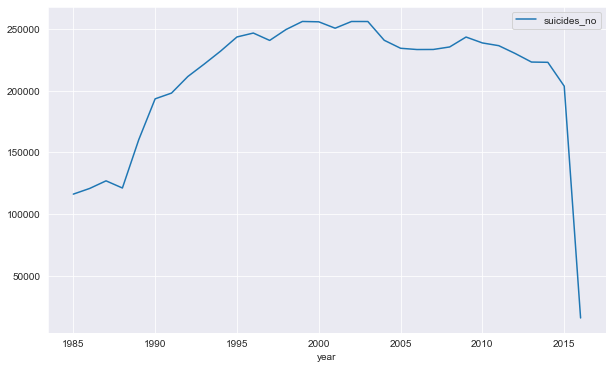

In [77]:
year_sui.plot(figsize=(10,6))

### Checking pattern using Trend plot (1985-2015) Population Vs Years

In [78]:
year_pop = data[["year","population"]].groupby('year').sum()
year_pop.head()

population
year            
1985  1008600086
1986  1029909613
1987  1095029726
1988  1054094424
1989  1225514347

<AxesSubplot:xlabel='year'>

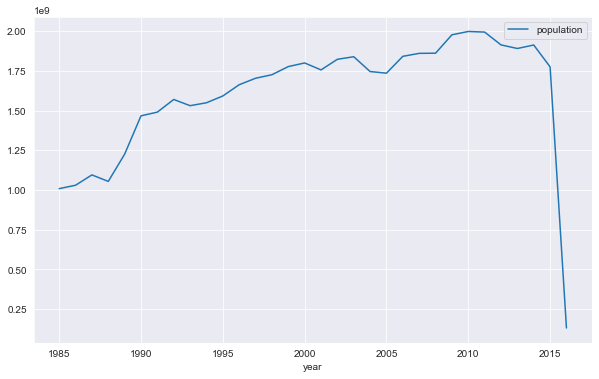

In [79]:
year_pop.plot(figsize = (10,6))

### Pandas Profiling with IPL data

- Generates profile reports from a pandas DataFrame. 
- pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

- Link - https://pypi.org/project/pandas-profiling/

In [80]:
df = pd.read_csv('match_data.csv')

In [81]:
df.head()

id  season    city        date                        team1  \
0  419164    2010  Mumbai  2010-04-24  Royal Challengers Bangalore   
1  419131    2010   Delhi  2010-03-29             Delhi Daredevils   
2  336021    2008  Mumbai  2008-05-16               Mumbai Indians   
3  980931    2016    Pune  2016-04-22      Rising Pune Supergiants   
4  419163    2010  Mumbai  2010-04-22          Chennai Super Kings   

                         team2              toss_winner toss_decision  \
0              Deccan Chargers          Deccan Chargers           bat   
1        Kolkata Knight Riders         Delhi Daredevils           bat   
2        Kolkata Knight Riders           Mumbai Indians         field   
3  Royal Challengers Bangalore  Rising Pune Supergiants         field   
4              Deccan Chargers      Chennai Super Kings           bat   

                        winner eliminator  ... overs  player_of_match  \
0  Royal Challengers Bangalore        NaN  ...    20         A Kumble   
1             Delhi Daredevils        NaN  ...    20        DA Warner   
2               Mumbai Indians        NaN  ...    20       SM Pollock   
3  Royal Challengers Bangalore        NaN  ...    20   AB de Villiers   
4          Chennai Super Kings        NaN  ...    20     DE Bollinger   

                                     venue      umpire1     umpire2 umpire3  \
0               Dr DY Patil Sports Academy  RE Koertzen  SJA Taufel     NaN   
1                         Feroz Shah Kotla    SS Hazare  SJA Taufel     NaN   
2                         Wankhede Stadium  BR Doctrove   DJ Harper     NaN   
3  Maharashtra Cricket Association Stadium  CB Gaffaney   VK Sharma     NaN   
4               Dr DY Patil Sports Academy  BR Doctrove   RB Tiffin     NaN   

                first_bat_team              first_bowl_team first_bat_score  \
0              Deccan Chargers  Royal Challengers Bangalore            82.0   
1             Delhi Daredevils        Kolkata Knight Riders           177.0   
2        Kolkata Knight Riders               Mumbai Indians            67.0   
3  Royal Challengers Bangalore      Rising Pune Supergiants           185.0   
4          Chennai Super Kings              Deccan Chargers           142.0   

  second_bat_score  
0             86.0  
1            137.0  
2             68.0  
3            172.0  
4            104.0  

[5 rows x 24 columns]

**It has many useful functionalities but the best one is to generate an EDA report as given below.**

In [82]:
#Installation step 
#!pip install pandas-profiling
#or 
import sys
!{sys.executable} -m pip install pandas-profiling

In [83]:
#import pandas_profiling
import pandas_profiling 

In [84]:
#Getting the pandas profiling report 
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
#Getting an html file as output here 
pandas_profiling.ProfileReport(df).to_file("pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                       ##### Thanks for your visiting.